In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/umutkizilirmak/Desktop/TSLA.csv')
df.dropna(inplace = True)

In [3]:
df.shape

(1259, 2)

In [4]:
df.describe()

,Open,Close
count,1259.000000,1259.000000
mean,132.197978,132.071343
std,117.865590,117.675990
min,12.073333,11.931333
25%,21.076000,21.091666
50%,93.132668,92.657333
75%,235.556671,236.125000
max,411.470001,409.970001


In [13]:
X = df['Open'].values.reshape(-1,1).astype('float32')
y = df['Close'].values.reshape(-1,1).astype('float32')

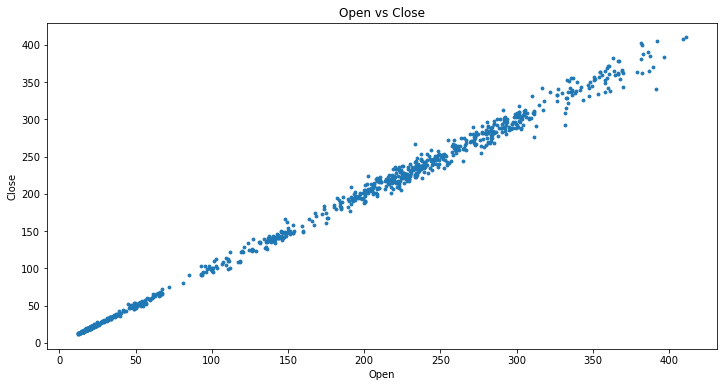

In [16]:
fig,(ax1) = plt.subplots(1, figsize = (12,6))
ax1.scatter (X, y, s = 8)
plt.title ('Open vs Close')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
h = LinearRegression()
h.fit(X_train,y_train)
print(h.intercept_) # to retrieve theta_0
print(h.coef_) # to retrieve theta_1

[0.24064636]
[[0.9974673]]


In [21]:
y_pred = h.predict(X_test)
compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
compare

,Actual,Predicted
0,22.670668,22.686319
1,28.350000,28.060675
2,20.102667,20.938093
3,350.583344,347.425781
4,19.653334,20.411430
...,...,...
247,240.066666,239.632797
248,23.077999,22.552660
249,14.810000,15.056360
250,20.062000,20.239201


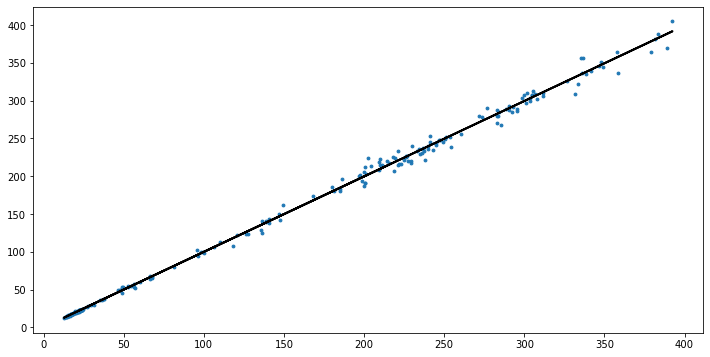

In [24]:
fig,(ax1) = plt.subplots(1, figsize = (12,6))
ax1.scatter (X_test, y_test, s = 8)
plt.plot(X_test,y_pred, color = 'black', linewidth = 2)
plt.show()

In [29]:
#pick some random value to start with
theta_0 = np.random.random()
theta_1 = np.random.random()
def hypothesis (theta_0,theta_1,X):
    return theta_1*X + theta_0
def cost_function (X,y,theta_0,theta_1):
    m = len(X)
    summation = 0.0
    for i in range (m):
        summation += ((theta_1 * X[i] + theta_0) - y[i])**2
    return summation /(2*m)
def gradient_descent(X,y,theta_0,theta_1,learning_rate):
    t0_deriv = 0
    t1_deriv = 0
    m = len(X)
    
    for i in range (m):
        t0_deriv += (theta_1 * X[i] + theta_0) - y[i]
        t1_deriv += ((theta_1 * X[i] + theta_0) - y[i])* X[i]
    theta_0 -= (1/m) * learning_rate * t0_deriv
    theta_1 -= (1/m) * learning_rate * t1_deriv
    
    return theta_0,theta_1
def training (X, y, theta_0, theta_1, learning_rate, iters):
    cost_history = [0]
    t0_history = [0]
    t1_history = [0]
    
    for i in range(iters):
        theta_0,theta_1 = gradient_descent(X, y, theta_0, theta_1, learning_rate)
        t0_history.append(theta_0)
        t1_history.append(theta_1)
        cost = cost_function(X, y, theta_0, theta_1)
        cost_history.append(cost)
        if i%10 == 0:
              print ("iter={}, theta_0={}, theta_1={}, cost= {}".format(i, theta_0, theta_1, cost))
    return t0_history, t1_history, cost_history

iter=0, theta_0=[0.93618464], theta_1=[120.50425], cost= [2.2393451e+08]
iter=10, theta_0=[4.4865736e+24], theta_1=[1.0642079e+27], cost= [inf]
iter=20, theta_0=[nan], theta_1=[nan], cost= [nan]


/var/folders/4m/090kl9xd5hb4c78vww6mv6fm0000gn/T/ipykernel_10879/466692292.py:10: RuntimeWarning: overflow encountered in add
  summation += ((theta_1 * X[i] + theta_0) - y[i])**2
/var/folders/4m/090kl9xd5hb4c78vww6mv6fm0000gn/T/ipykernel_10879/466692292.py:10: RuntimeWarning: overflow encountered in square
  summation += ((theta_1 * X[i] + theta_0) - y[i])**2
/var/folders/4m/090kl9xd5hb4c78vww6mv6fm0000gn/T/ipykernel_10879/466692292.py:19: RuntimeWarning: overflow encountered in add
  t1_deriv += ((theta_1 * X[i] + theta_0) - y[i])* X[i]
/var/folders/4m/090kl9xd5hb4c78vww6mv6fm0000gn/T/ipykernel_10879/466692292.py:21: RuntimeWarning: invalid value encountered in subtract
  theta_1 -= (1/m) * learning_rate * t1_deriv


iter=30, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=40, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=50, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=60, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=70, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=80, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=90, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=100, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=110, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=120, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=130, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=140, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=150, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=160, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=170, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=180, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=190, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=200, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=210, theta_0=[nan], theta_1=[nan], cost= [nan]
iter=220, theta_0=[

/Users/umutkizilirmak/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


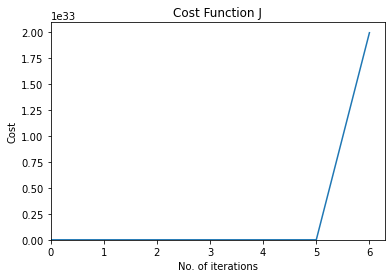

In [30]:
t0_history, t1_history, cost_history = training (X, y, theta_0, theta_1, 0.01, 2000)
#Plot the cost function
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_history)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()